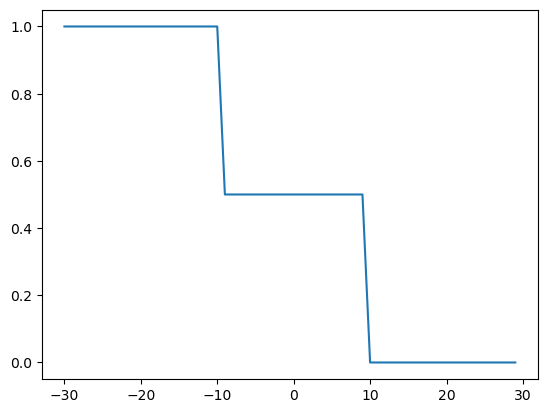

In [2]:
import torch
import matplotlib.pyplot as plt
 
# generate synthetic the data
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0
 
plt.plot(X, Y)
plt.show()

In [3]:

# Define the class for single layer NN
class one_layer_net(torch.nn.Module):    
    # Constructor
    def __init__(self, input_size, hidden_neurons, output_size):
        super(one_layer_net, self).__init__()
        # hidden layer 
        self.linear_one = torch.nn.Linear(input_size, hidden_neurons)
        self.linear_two = torch.nn.Linear(hidden_neurons, output_size) 
        # defining layers as attributes
        self.layer_in = None
        self.act = None
        self.layer_out = None
    # prediction function
    def forward(self, x):
        self.layer_in = self.linear_one(x)
        self.act = torch.sigmoid(self.layer_in)
        self.layer_out = self.linear_two(self.act)
        y_pred = torch.sigmoid(self.linear_two(self.act))
        return y_pred

In [4]:
# create the model 
model = one_layer_net(1, 2, 1)  # 2 represents two neurons in one hidden layer
 
def criterion(y_pred, y):
    out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
    return out
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Epoch  100 Loss  13.693950280314311
Epoch  200 Loss  13.692010960279731
Epoch  300 Loss  13.69008877268061
Epoch  400 Loss  13.688184390804963
Epoch  500 Loss  13.686298104948946
Epoch  600 Loss  13.684440381795866
Epoch  700 Loss  13.682599599153036
Epoch  800 Loss  13.680778994530556
Epoch  900 Loss  13.678977941177436
Epoch  1000 Loss  13.677195031996234
Epoch  1100 Loss  13.675429240596713
Epoch  1200 Loss  13.673678979685064
Epoch  1300 Loss  13.671942694767495
Epoch  1400 Loss  13.670223395092762
Epoch  1500 Loss  13.668519986691535
Epoch  1600 Loss  13.666828344052192
Epoch  1700 Loss  13.665150652799639
Epoch  1800 Loss  13.66348894595285
Epoch  1900 Loss  13.661840744491201
Epoch  2000 Loss  13.66020614435547
Epoch  2100 Loss  13.658580808580155
Epoch  2200 Loss  13.656971345189959
Epoch  2300 Loss  13.655374463225598
Epoch  2400 Loss  13.653791523698601
Epoch  2500 Loss  13.652221740456298
Epoch  2600 Loss  13.650663953507319
Epoch  2700 Loss  13.649119543246343
Epoch  2800 L

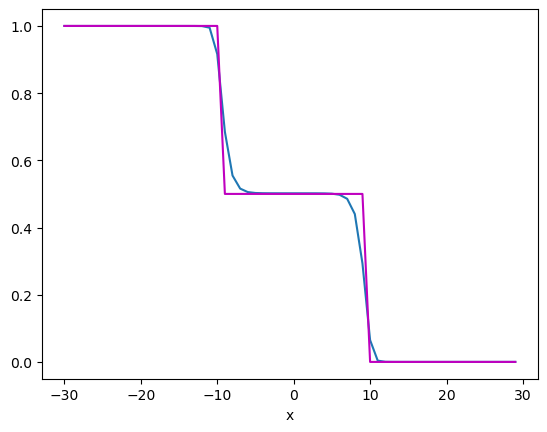

In [9]:
# Define the training loop
epochs=10000
cost = []
total=0
for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    for x, y in zip(X, Y):
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # get total loss 
        total+=loss.item() 
    cost.append(total)
    if epoch % 100 == 0:
        print("Epoch ", epoch, "Loss ", total, flush=True)
    if epoch % 10000 == 0:
        print(str(epoch)+ " " + "epochs done!") # visualze results after every 1000 epochs   
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

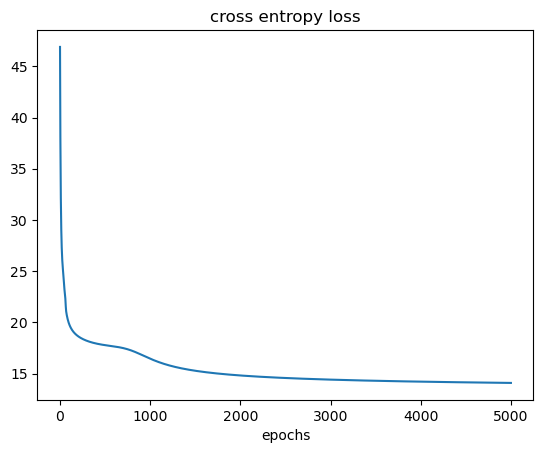

In [6]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('cross entropy loss')
plt.show()